# 

In [1]:
from UUMCdata import CausalModel, tsCausalModel

In [1]:
#for local testing
import sys
sys.path.append('../UUMCdata')
from CausalModel import CausalModel, tsCausalModel

# Documentation

In [2]:
help(CausalModel)

Help on class CausalModel in module UUMCdata.CausalModel:

class CausalModel(builtins.object)
 |  CausalModel(N, init_type='ER', p=0.5, init=None, noise=None, labels=None)
 |
 |  Data-generation object, and methods for creating and manipulating them.
 |  - Always contains a causal graph with adjacencies `self.get_adjacencies()`
 |    where a_{ji}=1 <=> X_j -> X_i.
 |  - Becomes a linear additive Gaussian SCM after calling `self.gen_coefficients(...)`.
 |    Causal coefficients are given by `self.A` and noise standard deviations are
 |    given by `self.s`.
 |  - May also hold generated data after calling `self.gen_data(...)`.
 |
 |  Initialization Parameters
 |  _________________________
 |  N : int
 |      Number of vertices
 |  init_type : string (default: 'ER')
 |      Method for generating the adjacency matrix. Options include:
 |          'connected': a fully-connected acyclic time series DAG
 |          'ER': Erdös-Rényi random graph generation.
 |                Randomly include

# The simplest approach:

[X₁][X₀|X₁][X₂][X₃|X₁,X₂]


CausalModel at 0x7fffd667c6e0: [X₁][X₀|X₁][X₂][X₃|X₁,X₂]

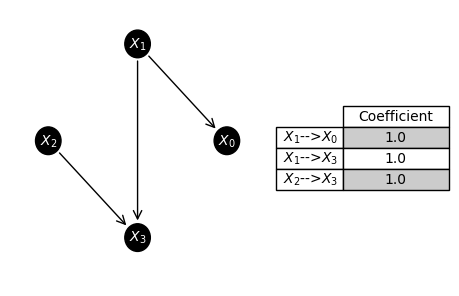

In [3]:
G = CausalModel(4)
G

X₁=U₁,			U₁~N(0,1.0)
X₀=-0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.02X₁+0.46X₂+U₃,	U₃~N(0,0.89)


CausalModel at 0x7fffd667c6e0
X₁=U₁,			U₁~N(0,1.0)
X₀=-0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.02X₁+0.46X₂+U₃,	U₃~N(0,0.89)

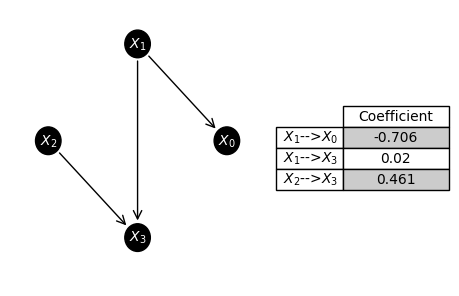

In [4]:
G.gen_coefficients()

Data object at 0x7fff9b390b90: 
           X₀        X₁        X₂        X₃
0   -1.585217  1.320790  1.153301  1.153305
1   -0.405739 -0.725205 -0.175171 -1.995098
2    1.370920 -0.937979  1.706137  1.688637
3   -0.733907  1.266399  1.231459  0.868790
4   -0.727171  0.185420 -0.260821  0.137722
..        ...       ...       ...       ...
195  0.897092 -0.503723  0.207255  0.467680
196  0.399899 -0.311537 -0.042216 -0.597732
197 -1.211946  1.345362  0.267545  0.916001
198  0.577255 -0.469011  0.074849 -0.035634
199 -1.345677 -0.425258  0.087009 -0.429547

[200 rows x 4 columns]

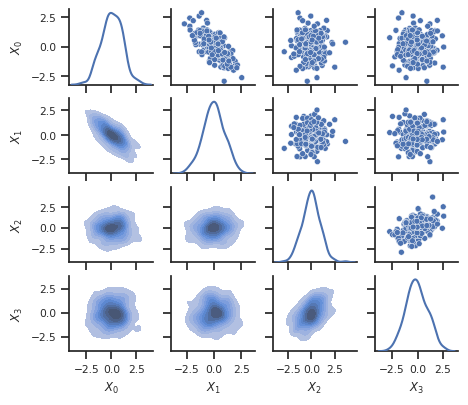

In [6]:
G.gen_data(200) #visualization can be slow

In [7]:
print(G.topo_order)

[1 0 2 3]


In [8]:
print(G.data.var().squeeze())

[1.0333773  0.93538966 0.93827005 1.07082405]


In [9]:
G.sortability('var')

1.0

In [10]:
print(G.data.R2().squeeze())

[0.51457431 0.51974167 0.24161474 0.2318745 ]


In [11]:
G.sortability('R2')

0.0

In [12]:
DS = CausalModel.gen_dataset(5,100,100);

100% completed


In [13]:
DS[0:2]

[CausalModel at 0x7fff92e54410
 X₁=U₁,			U₁~N(0,1.0)
 X₀=-0.07X₁+U₀,		U₀~N(0,1.0)
 X₄=-0.56X₀+U₄,		U₄~N(0,0.83)
 X₃=U₃,			U₃~N(0,1.0)
 X₂=-0.05X₀+0.15X₄+U₂,	U₂~N(0,0.98),
 CausalModel at 0x7fff9d7468b0
 X₁=U₁,				U₁~N(0,1.0)
 X₃=-0.72X₁+U₃,			U₃~N(0,0.69)
 X₀=-0.4X₃+U₀,			U₀~N(0,0.92)
 X₂=+0.56X₀+0.7X₁+0.17X₃+U₂,	U₂~N(0,0.44)
 X₄=+0.46X₁+U₄,			U₄~N(0,0.89)]

In [14]:
[d.data for d in DS[0:2]]

[Data object at 0x7fff92e54550: 
           X₀        X₁        X₂        X₃        X₄
 0   0.173004 -0.419713  1.328174 -1.635909  0.003394
 1   1.446108  0.763158 -0.280406 -1.162029 -0.687624
 2  -0.531294  0.477127 -0.656505  0.127440  0.905855
 3   0.983631  1.230038 -1.480871 -0.689153  0.054685
 4   0.714505 -0.094776 -1.847769 -0.121245  0.802890
 ..       ...       ...       ...       ...       ...
 95  0.605242 -1.043208 -0.426591  0.803327 -0.610503
 96 -0.351870 -1.035667 -0.698264  0.638869  0.797444
 97  0.820569  1.585321  0.965102 -0.204169 -0.062259
 98 -2.333247  1.896156  0.957903 -0.088566  0.957745
 99 -0.626575  0.531702 -0.126752 -0.739355  0.050401
 
 [100 rows x 5 columns],
 Data object at 0x7fff9d746780: 
           X₀        X₁        X₂        X₃        X₄
 0  -0.104583  1.196858  0.550243 -1.218647  1.860433
 1   0.448448 -1.747016 -0.306958  1.593385 -1.898186
 2  -0.615592  0.332405 -0.139750  0.544637 -0.392796
 3  -0.987373 -1.678354 -1.762957  1.874732

In [15]:
print([d.sortability() for d in DS])

[1.0, 0.7142857142857143, 1.0, 0.0, 0.0, 0.5, 0.5714285714285714, 0.2, 0.5, 0.3333333333333333, 0.6666666666666666, 0.5, 0.0, 0.8333333333333334, 0.8571428571428571, 0.6, 0.6, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.75, 0.8, 0.5714285714285714, 0.7777777777777778, 0.6666666666666666, 0.5714285714285714, 0.2857142857142857, 0.0, 0.14285714285714285, 0.5, 0.5, 0.2857142857142857, 0.5714285714285714, 0.7777777777777778, 0.6666666666666666, 0.14285714285714285, 0.25, 0.42857142857142855, 0.6666666666666666, 0.5555555555555556, 0.2, 0.0, 0.8333333333333334, 0.8888888888888888, 0.625, 0.6, 0.2, 0.0, 0.4, 0.5, 0.14285714285714285, 0.0, 0.8888888888888888, 0.4, 0.4, 0.3, 0.6666666666666666, 0.5714285714285714, 0.6666666666666666, 0.16666666666666666, 0.5, 0.5555555555555556, 1.0, 0.875, 0.625, 0.3333333333333333, 0.5, 0.625, 0.75, 0.7777777777777778, 0.8571428571428571, 0.6666666666666666, 0.5, 0.6, 0.4444444444444444, 0.3333333333333333, 0.625, 1.0, 0.0, 0.5, 0.375, 1.0, 0.3333333

# Other generation options

In [16]:
help(CausalModel.gen_coefficients)

Help on function gen_coefficients in module UUMCdata.CausalModel:

gen_coefficients(self, style='UUMC', gen_args={})
    Creates an SCM from the graph using any STYLE from GENERATION_OPTIONS_:
    UUMC : Produces unitless, unrestricted, Markov-consistent SCMs.
           Introduced here, recommended (https://doi.org/10.48550/arXiv.2503.17037)
    unit-variance-noise : Draws coefficients uniformly from [-HIGH, -LOW]U[LOW, HIGH],
                          and sets all noise variances to 1. Defaults LOW=.5, HIGH=2.
                          Typically used (https://doi.org/10.48550/arXiv.1803.01422)
    iSCM : Begins with UVN SCM generation. The SCM is not complete until calling
           GEN_DATA. During data generation, the coefficients (and data) for each
           variable are standardized by the sample standard deviation of the gener-
           ated data before moving on to the next variable in the topological order
           (https://arxiv.org/abs/2406.11601)
    IPA : Each varia

X₂=U₂,				U₂~N(0,1.0)
X₃=U₃,				U₃~N(0,1.0)
X₄=U₄,				U₄~N(0,1.0)
X₀=+0.59X₄+U₀,			U₀~N(0,1.0)
X₁=-1.69X₀+1.49X₃+1.02X₄+U₁,	U₁~N(0,1.0)


CausalModel at 0x7fff92e80950
X₂=U₂,				U₂~N(0,1.0)
X₃=U₃,				U₃~N(0,1.0)
X₄=U₄,				U₄~N(0,1.0)
X₀=+0.59X₄+U₀,			U₀~N(0,1.0)
X₁=-1.69X₀+1.49X₃+1.02X₄+U₁,	U₁~N(0,1.0)

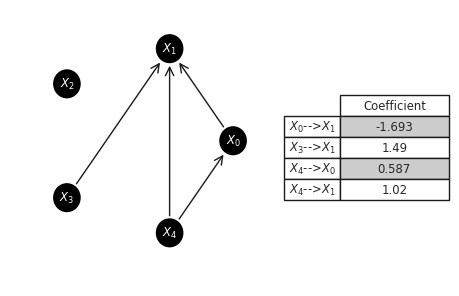

In [17]:
CausalModel(5, p=0.7).gen_coefficients(style='iSCM')

In [18]:
help(CausalModel.gen_dataset)

Help on method gen_dataset in module UUMCdata.CausalModel:

gen_dataset(N, O, B, init_args={}, coef_args={}, every=20) class method of UUMCdata.CausalModel.CausalModel
    Returns a list of B initialized CausalModels with N variables
    each containing generated data with O (for 'observations') samples.

    Parameters
    __________
    N : int
        Number of vertices
    O : int
        Number of samples
    B : int
        Number of SCMs
    init_args : dictionary (default: empty)
        additional arguments for CausalModel instantiation
        may include keys in ['init_type', 'p', 'init', 'noise', 'labels']
    coef_args : dictonary (default: empty)
        additional arguments for CausalModel.gen_coefficients()
        may include keys in ['style', 'gen_args']
    every : int (default: 20)
        The progress message is updated every time this many CausalModels are generated.

    Returns
    _______
    A list of initialized CausalModels with generated data.



In [19]:
import numpy as np

In [20]:
collider = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 0]])
collider

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 0]])

In [21]:
DS = CausalModel.gen_dataset(3,100,100, 
                             init_args={'init_type': 'specified', 'init': collider}, 
                             coef_args={'style': 'unit-variance-noise', 'gen_args': {'low': 0.2}});

100% completed


X₀=U₀,			U₀~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=-0.81X₀-0.81X₁+U₂,	U₂~N(0,1.0)


CausalModel at 0x7fff92e82d50
X₀=U₀,			U₀~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=-0.81X₀-0.81X₁+U₂,	U₂~N(0,1.0)

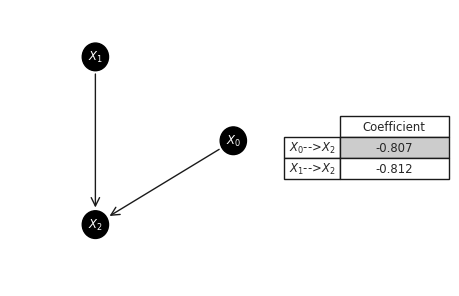

In [22]:
DS[42]

Data object at 0x7fff92ecaeb0: 
          X₀        X₁        X₂
0  -1.340362 -0.589826  1.234580
1  -0.689490 -0.261899  1.075109
2   0.392020  0.714718 -0.240151
3  -1.328032  0.631806 -0.607396
4   0.543873  0.103440  2.423131
..       ...       ...       ...
95  1.071867  0.503378 -1.063402
96  0.192865 -0.134828 -0.984982
97  1.116232 -1.728570  0.118361
98  0.231680  1.142746 -1.091488
99  0.990030  1.009015 -0.531019

[100 rows x 3 columns]

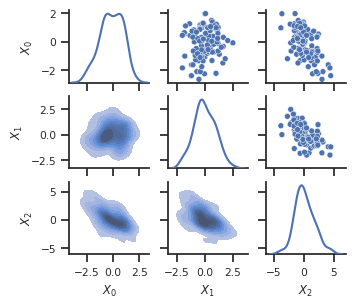

In [23]:
DS[42].data

# Exploring Additional Functionality

X₁=U₁,			U₁~N(0,1.0)
X₀=-0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.02X₁+0.46X₂+U₃,	U₃~N(0,0.89)


CausalModel at 0x7fffd667c6e0
X₁=U₁,			U₁~N(0,1.0)
X₀=-0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.02X₁+0.46X₂+U₃,	U₃~N(0,0.89)

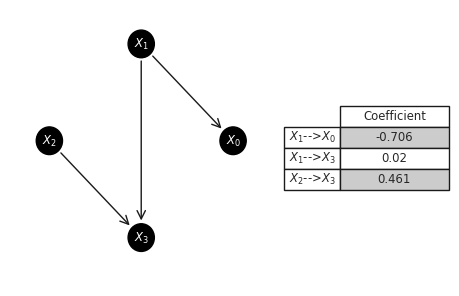

In [24]:
G

X₁=U₁,			U₁~N(0,1.0)
X₀=+0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.02X₁+0.46X₂+U₃,	U₃~N(0,0.89)


CausalModel at 0x7fff92be9a90
X₁=U₁,			U₁~N(0,1.0)
X₀=+0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.02X₁+0.46X₂+U₃,	U₃~N(0,0.89)

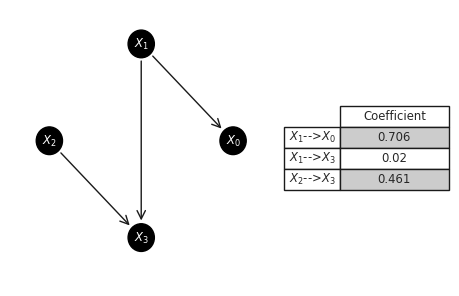

In [25]:
abs(G)

In [26]:
G==abs(G)

False

X₁=U₂,			U₂~N(0,1.0)
X₀=-0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₁,			U₁~N(0,1.0)
X₃=+0.46X₂+0.02X₁+U₃,	U₃~N(0,0.89)


CausalModel at 0x7fff9282a690
X₁=U₂,			U₂~N(0,1.0)
X₀=-0.71X₁+U₀,		U₀~N(0,0.71)
X₂=U₁,			U₁~N(0,1.0)
X₃=+0.46X₂+0.02X₁+U₃,	U₃~N(0,0.89)

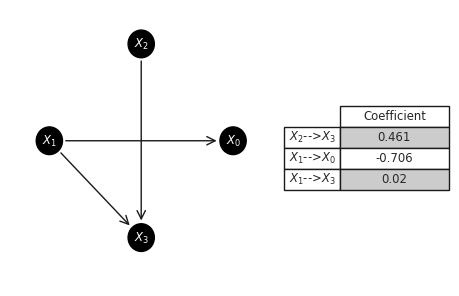

In [33]:
G2 = G.copy().shuffle()
G2

In [34]:
G==G2

True

X₁=U₁,			U₁~N(0,1.0)
X₀=U₀,			U₀~N(0,0.5)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.01X₁+0.01X₂+U₃,	U₃~N(0,0.79)


CausalModel at 0x7fff92a4d490
X₁=U₁,			U₁~N(0,1.0)
X₀=U₀,			U₀~N(0,0.5)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.01X₁+0.01X₂+U₃,	U₃~N(0,0.79)

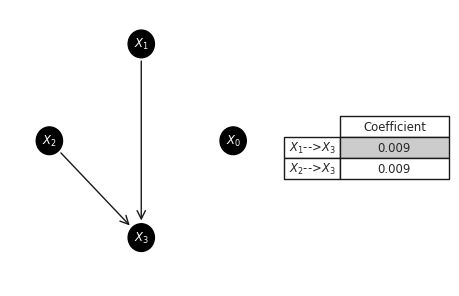

In [35]:
G*G2

X₁=U₁,			U₁~N(0,1.0)
X₀=+0.5X₁+U₀,		U₀~N(0,0.5)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.0X₁+0.21X₂+U₃,	U₃~N(0,0.79)


CausalModel at 0x7fff92a4dcd0
X₁=U₁,			U₁~N(0,1.0)
X₀=+0.5X₁+U₀,		U₀~N(0,0.5)
X₂=U₂,			U₂~N(0,1.0)
X₃=+0.0X₁+0.21X₂+U₃,	U₃~N(0,0.79)

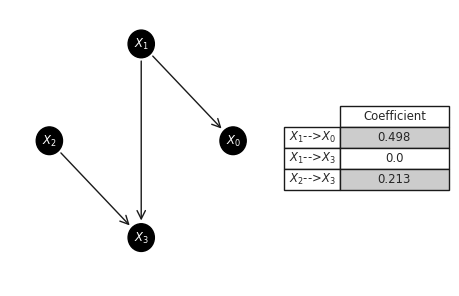

In [36]:
G**2

X₁=U₁,			U₁~N(0,1.0)
X₀=+1.0X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+1.0X₁+1.0X₂+U₃,	U₃~N(0,0.89)


CausalModel at 0x7fff92a4e510
X₁=U₁,			U₁~N(0,1.0)
X₀=+1.0X₁+U₀,		U₀~N(0,0.71)
X₂=U₂,			U₂~N(0,1.0)
X₃=+1.0X₁+1.0X₂+U₃,	U₃~N(0,0.89)

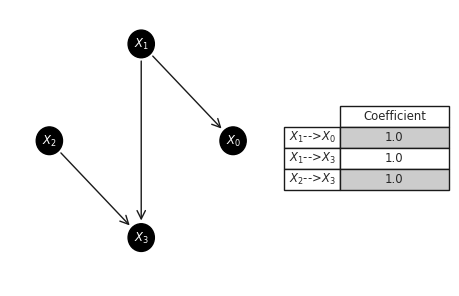

In [37]:
arr = G.A.copy()
arr[G.A==0]=1
G/arr

In [38]:
print(G[:,:])

[[-0.         -0.          0.         -0.        ]
 [-0.70568078  0.         -0.          0.0201562 ]
 [-0.         -0.          0.          0.460987  ]
 [ 0.         -0.          0.         -0.        ]]


In [39]:
print(G.get_adjacencies())

[[False False False False]
 [ True False False  True]
 [False False False  True]
 [False False False False]]


In [40]:
print(G.get_num_parents())

[1 0 0 2]


In [41]:
print(G.ancestry())

[[False False False False]
 [ True False False  True]
 [False False False  True]
 [False False False False]]


In [42]:
print(G.AXIS_LABELS)

{'source': 0, 'sink': 1, None: None, 'time': 2}


In [43]:
print(G.any('source'))

[ True False False  True]


In [44]:
print(G.sum('sink'))

[ 0.         -0.68552458  0.460987    0.        ]


X₁=U₂,			U₂~N(0,1.0)
X₀=U₀,			U₀~N(0,0.71)
X₂=U₁,			U₁~N(0,1.0)
X₃=+0.46X₂+0.02X₁+U₃,	U₃~N(0,0.89)


CausalModel at 0x7fff92a4c110
X₁=U₂,			U₂~N(0,1.0)
X₀=U₀,			U₀~N(0,0.71)
X₂=U₁,			U₁~N(0,1.0)
X₃=+0.46X₂+0.02X₁+U₃,	U₃~N(0,0.89)

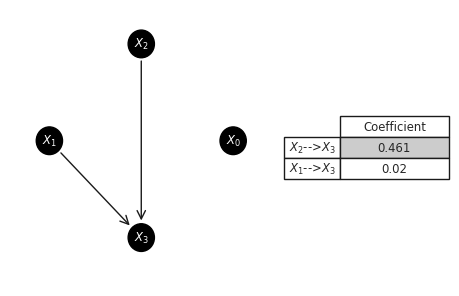

In [45]:
G2.triu()

X₀=U₀,			U₀~N(0,0.71)
X₃=U₃,			U₃~N(0,0.89)
X₂=+0.46X₃+U₂,		U₂~N(0,1.0)
X₁=-0.71X₀+0.02X₃+U₁,	U₁~N(0,1.0)


CausalModel at 0x7fff92a4dfd0
X₀=U₀,			U₀~N(0,0.71)
X₃=U₃,			U₃~N(0,0.89)
X₂=+0.46X₃+U₂,		U₂~N(0,1.0)
X₁=-0.71X₀+0.02X₃+U₁,	U₁~N(0,1.0)

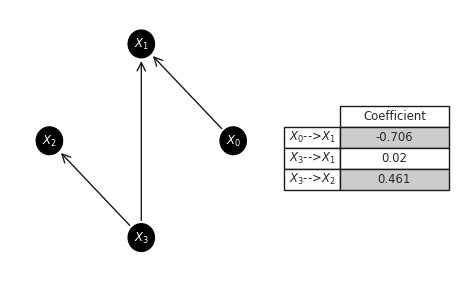

In [46]:
CausalModel.specified(G.transpose(), noise=G.s)

In [49]:
G = CausalModel(4, labels=["o", "t", "e", "f"]).gen_coefficients()

o=U₀,		U₀~N(0,1.0)
f=+0.35o+U₃,	U₃~N(0,0.94)
e=-0.65f+U₂,	U₂~N(0,0.76)
t=-0.97e+U₁,	U₁~N(0,0.24)


CausalModel at 0x7fff92dc1e50
o=U₀,		U₀~N(0,1.0)
f=+0.35o+U₃,	U₃~N(0,0.94)
e=-0.65f+U₂,	U₂~N(0,0.76)
t=-0.97e+U₁,	U₁~N(0,0.24)

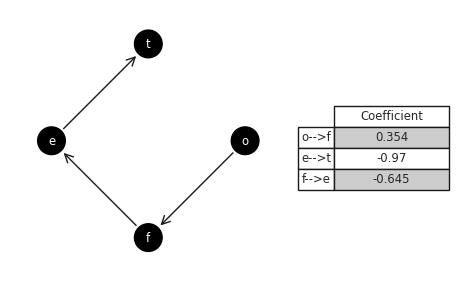

In [50]:
G

In [51]:
G_cl = G.to_causallearn()
print(G_cl)

Graph Nodes:
o;t;e;f

Graph Edges:
1. o --> f
2. e --> t
3. f --> e



[o][f|o][e|f][t|e]


CausalModel at 0x7fff92dc3590: [o][f|o][e|f][t|e]

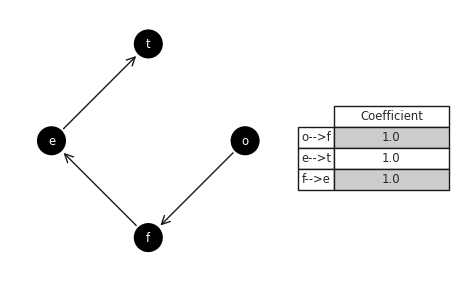

In [52]:
CausalModel.from_causallearn(G_cl)

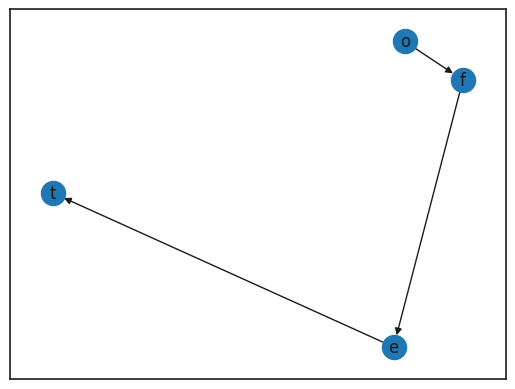

In [53]:
import networkx as nx
G_nx = G.to_networkx()
nx.draw_networkx(G_nx)

[o][f|o][e|f][t|e]


CausalModel at 0x7fff9d60e8d0: [o][f|o][e|f][t|e]

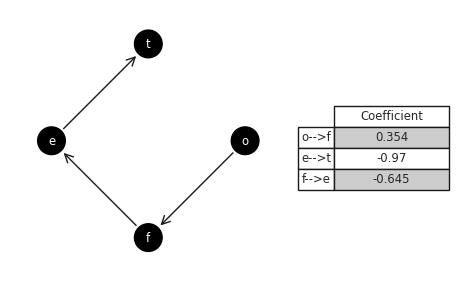

In [54]:
CausalModel.from_networkx(G_nx)

In [55]:
G_cd = G.to_causaldag()
G_cd

/work/bd1083/b309244/conda/envs/test/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[0][3|0][2|3][1|2]

X₀=U₀,		U₀~N(0,1.0)
X₃=+0.35X₀+U₃,	U₃~N(0,0.94)
X₂=-0.65X₃+U₂,	U₂~N(0,0.76)
X₁=-0.97X₂+U₁,	U₁~N(0,0.24)


CausalModel at 0x7ffeac93a690
X₀=U₀,		U₀~N(0,1.0)
X₃=+0.35X₀+U₃,	U₃~N(0,0.94)
X₂=-0.65X₃+U₂,	U₂~N(0,0.76)
X₁=-0.97X₂+U₁,	U₁~N(0,0.24)

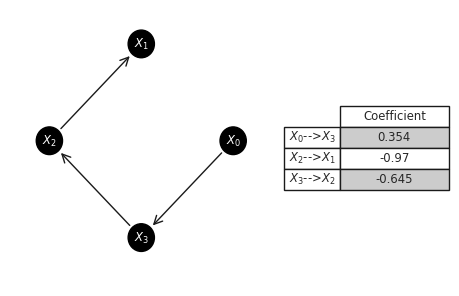

In [56]:
CausalModel.from_causaldag(G_cd)

In [57]:
CausalModel.from_causaldag(G_cd)==G

True

# Time Series (Beta)

## Documentation

In [45]:
help(tsCausalModel)

Help on class tsCausalModel in module UUMCdata.CausalModel:

class tsCausalModel(CausalModel)
 |  tsCausalModel(
 |      N,
 |      tau_max,
 |      init_type='ER',
 |      p=0.5,
 |      p_auto=0.8,
 |      init=None,
 |      noise=None,
 |      labels=None
 |  )
 |
 |  Time-series Data-generation object, and methods for creating and manipulating them.
 |  - Always contains a time-series causal graph with adjacencies self.A != 0
 |    (self.adjacencies() returns the adjacencies in the summary graph)
 |  - Becomes a linear additive Gaussian SCM after calling GEN_COEFFICIENTS.
 |    Causal coefficients are given by self.A and noise standard deviations are
 |    given by self.s.
 |  - May also hold generated data after calling GEN_DATA
 |
 |  Initialization Parameters
 |  __________
 |  N : int
 |      Number of random variables
 |  tau_max : int
 |      Maximum delay between a cause and its effect
 |  init_type : string (default: 'ER')
 |      Method for generating the adjacency matrix.

## Usage

tsCausalModel at 0x7fffac7592b0


tsCausalModel at 0x7fffac7592b0tsCausalModel at 0x7fffac7592b0

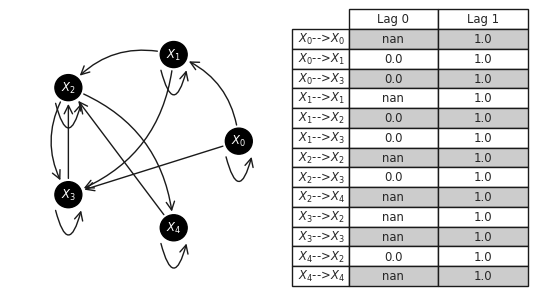

In [46]:
G = tsCausalModel(5, 1)
G

                                                                     
tsCausalModel at 0x7fffac7592b0


tsCausalModel at 0x7fffac7592b0
tsCausalModel at 0x7fffac7592b0

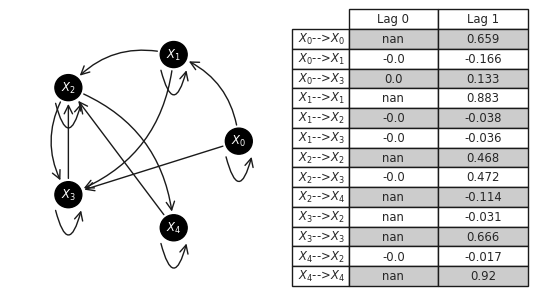

In [56]:
G.gen_coefficients()

Data object at 0x7fffa83d2ad0: 
           X₀        X₁        X₂        X₃        X₄
0    0.786998 -0.506351  0.481393 -1.024048  0.368597
1    1.520756 -0.466984  0.600613 -0.101777  0.234109
2    0.663114 -0.569473 -0.221975 -0.278691  0.614370
3   -1.248949 -0.248381 -0.309613 -0.029165  0.819328
4   -0.068142  0.201395 -0.133987 -0.189651  0.757480
..        ...       ...       ...       ...       ...
995  0.022247  0.324076  0.818815 -1.439561  0.421037
996 -0.028383  0.749813  0.393335 -0.552694  0.394432
997 -0.430765  0.353872  0.806585  0.095290  0.533719
998  0.575917  0.608485  1.703456  0.139585  0.853463
999  0.918328 -0.088753 -0.090319  1.449309  0.064683

[1000 rows x 5 columns]

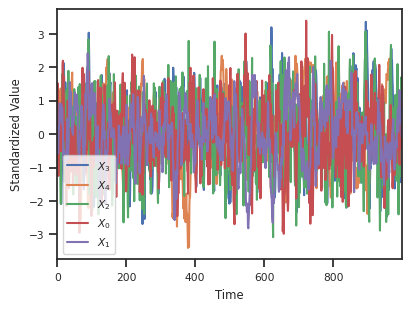

In [57]:
G.gen_data()

In [58]:
G.sortability()

0.8571428571428571

In [59]:
G.sortability('R2')

0.7142857142857143

In [60]:
G.sortability('R2_summary')

1.0

In [61]:
help(tsCausalModel.gen_dataset)

Help on method gen_dataset in module UUMCdata.CausalModel:

gen_dataset(
    N,
    tau_max,
    T,
    B,
    init_args={},
    coef_args={},
    time_limit=5,
    verbose=False,
    text_trap=None
) class method of UUMCdata.CausalModel.tsCausalModel
    Method for generating data from many random SCMs.

    Parameters
    _________
    N : int
        Number of nodes to include in a graph
    tau_max: int
        Maximum time-lag
    T : int, optional (Default: 1000)
        Number of observations in each generated time series
    B : int, optional (Default: 100)
        Number of SCMs (and associated data) to generate
    init_args : dict, optional (Default: {})
        additional arguments for graph initialization
    coef_args : dictionary, optional (Default: {})
        additional arguments for to gen_coefficients
    time_limit : int, optional (Default: 5)
        Maximum number of seconds to spend on each attempt at generating an SCM
    verbose : boolean, optional (Default: Fa

In [62]:
DS = tsCausalModel.gen_dataset(5,1,100,10);

Discarded 9 systems due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 1 GenerationError, and 8 TimeoutExceptions


In [63]:
DS[0:2]

[tsCausalModel at 0x7fffaa5bbce0
 tsCausalModel at 0x7fffaa5bbce0,
 tsCausalModel at 0x7fffac7b49d0
 tsCausalModel at 0x7fffac7b49d0]

In [64]:
[d.data for d in DS[0:2]]

[Data object at 0x7fffaa5bbbb0: 
           X₀        X₁        X₂        X₃        X₄
 0   0.282672 -0.002591  0.853689  0.062324  0.034314
 1   0.075987 -1.343367  1.144599 -0.036898 -1.497548
 2   0.058047  0.583644  2.499889 -1.886731  1.614697
 3  -1.766212  1.490607  1.153597 -1.979223  0.669420
 4  -0.261827  1.423402  1.755741 -1.092296 -1.202379
 ..       ...       ...       ...       ...       ...
 95  1.941206 -0.726586 -0.615659  1.420992 -1.448217
 96  0.915732  0.234013  0.467835 -0.529702 -0.073177
 97 -0.172019  0.915053  1.594220  0.693828  1.952241
 98  1.030431  0.351434  1.382436 -0.289110  2.050411
 99 -0.988980  1.367972  1.326644  0.029743 -1.409272
 
 [100 rows x 5 columns],
 Data object at 0x7fffac7b4510: 
           X₀        X₁        X₂        X₃        X₄
 0  -0.479787 -0.894428  0.099580 -0.536499  0.951488
 1   1.087137 -0.520590  1.860431 -0.183012  0.406939
 2  -0.666794  0.037980 -1.059665 -1.408981  1.619718
 3   0.275192  2.102020  0.423792 -0.036392

In [65]:
print(np.array([d.sortability() for d in DS]))

[0.5        0.75       0.42857143 0.66666667 0.16666667 0.
 0.5        0.22222222 0.75       0.5       ]


## Other initialization Options

tsCausalModel at 0x7fffa3aa9220


tsCausalModel at 0x7fffa3aa9220tsCausalModel at 0x7fffa3aa9220

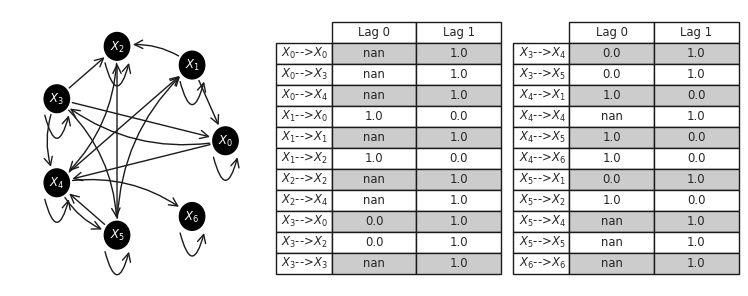

In [66]:
G = tsCausalModel(7,1, p_auto=1)
G

                                                                     
tsCausalModel at 0x7fffa3789220


tsCausalModel at 0x7fffa3789220
tsCausalModel at 0x7fffa3789220

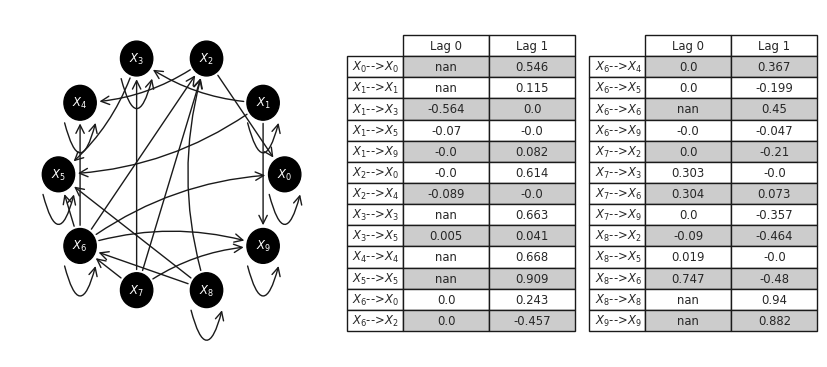

In [69]:
G = tsCausalModel(10, 1, init_type='no_feedback').gen_coefficients() #faster!
G

Data object at 0x7fffa9ddd3d0: 
           X₀        X₁        X₂        X₃        X₄        X₅        X₆  \
0    1.538131  0.453545  0.579757 -2.217519 -1.164016  1.170750  0.869892   
1    1.339729  0.989090 -0.173614 -2.111325 -0.221188  0.790465  0.611307   
2    0.234991  0.533819 -1.362844 -2.274777  0.056620  0.599953  1.143416   
3   -0.137421  0.272810 -1.176419 -1.335732  0.387422  0.283097  0.264442   
4   -0.785917 -0.727855 -0.285195 -0.610425  0.200563  0.267246 -1.092273   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.934483 -1.374212 -0.733302  0.703345  1.083818 -0.938002  1.011154   
996 -0.418169  0.313422 -2.044172 -0.349930  1.255609 -1.023533 -0.519753   
997 -1.503482 -0.162259 -1.422334 -0.200726  0.861076 -0.710108  0.300678   
998 -2.296103 -0.177483 -1.705932  0.481844  0.780028 -0.703124 -0.100870   
999 -3.063949 -0.934755 -1.005010  1.174898  1.031276 -0.554155  0.994150   

           X₇        X₈        X₉  
0   -1.586645  0.445642  2.200869  
1   -0.756641  1.002959  2.304195  
2   -0.561081  1.554408  2.764157  
3   -0.656559  1.533882  2.883770  
4   -1.478748  1.307348  2.864848  
..        ...       ...       ...  
995  0.419447  2.367979  0.047007  
996 -2.339362  2.058830 -0.809599  
997  1.436958  2.116639  0.393402  
998  0.207094  1.772848 -0.421691  
999  1.052984  1.258744 -0.550746  

[1000 rows x 10 columns]

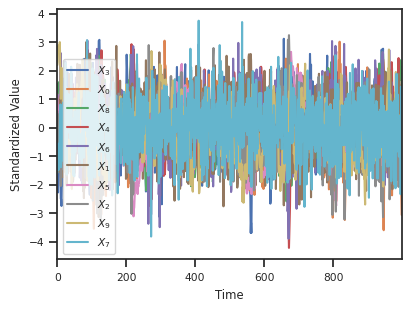

In [70]:
G.gen_data()

In [71]:
print(G.data.var())

[[1.12775992]
 [1.05719242]
 [1.00541197]
 [1.22011973]
 [1.08350204]
 [1.05470218]
 [1.05762731]
 [0.97874961]
 [1.10788075]
 [1.00540356]]


In [72]:
G.sortability()

0.5416666666666666

In [73]:
G.sortability('R2')

0.8333333333333334

In [74]:
G.sortability('R2_summary')

0.5